# Convolutional Neural Networks (CNNs)

Since the previous neural networks boom in 1990's the single major development step was to move from fully connected neural network architectures to convolutional neural networks (CNNs).

### Demo: MNIST

Let's play with real data and incrementally move from a single perceptron to multi-layer perceptron (MLP) and finally to convolutional neural network (CNN).

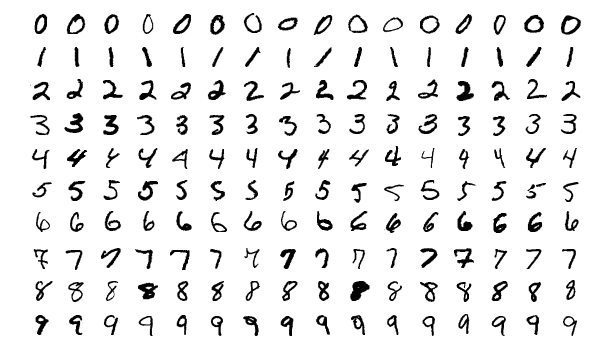

Let's load the required packages (we use TensorFlow here)

In [ ]:
import tensorflow as tf
import keras
import numpy as np
print("TensorFlow version:", tf.__version__)

Let's load the MNIST dataset of handwritten digits.

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0
print(f'Size on X_train: {x_train.shape}')
print(f'Size on y_train: {y_train.shape}')
print(f'Size on X_test: {x_test.shape}')
print(f'Size on y_test: {y_test.shape}')
print(f' MNIST class values (y_train and y_test) are between {np.min(y_test)} and {np.max(y_test)}')

Let's then display examples of data

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=[12,3])
ax1.imshow(x_train[0,:,:])
ax1.set_title(f'Class number {y_train[0]}')
ax2.imshow(x_train[1,:,:])
ax2.set_title(y_train[1])
ax3.imshow(x_train[2,:,:])
ax3.set_title(y_train[2])
ax4.imshow(x_train[3,:,:])
ax4.set_title(y_train[3])
plt.show()

### Demo: MNIST & Single Perceptron

Let's make a single perceptron. Since that can learn only two-class problem, we need to make 10 of them.

In [ ]:
model = tf.keras.models.Sequential()

# Flatten input image to a vector
model.add(keras.layers.Flatten(input_shape=(28,28)))
print(model.output_shape)

# Add a layer of 1 neuron
model.add(keras.layers.Dense(1,activation='sigmoid'))
print(model.output_shape)

Compile

In [ ]:
loss_fn = tf.keras.losses.MeanSquaredError()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.summary()

Since single neuron cannot recognize more than two classes (remember AND and OR), let's make it a detector for the digit "0" (class 0) and let's put all other classes to Class 1.

In [ ]:
y_test_one_class = y_test.copy()
y_test_one_class[np.where(y_test != 0)] = 1

y_train_one_class = y_train.copy()
y_train_one_class[np.where(y_train != 0)] = 1

How well it works without training

In [ ]:
# Test before training
y_pred = model.predict(x_test)
likely_err = 0
for vali,val in enumerate(y_pred):
    pred_err = y_test_one_class[vali]-val[0]
    if abs(pred_err) > 0.5:
        likely_err += 1
        print('Likely error')
        print(f'{vali:3d}: y = {y_test[vali]} y_one_class = {y_test_one_class[vali]} y_p = {val[0]:1.2f} err = {pred_err:1.2f}')
print(f'{likely_err} samples out of {y_test.size} wrong!')
model.evaluate(x_test,  y_test_one_class, verbose=2)

Let's train for one epoch (accuracy of saying "1" to all test samples is 0.900)

In [ ]:
model.fit(x_train, y_train_one_class, epochs=1)

Let's test the trained model (accuracy of saying "1" to all test samples is 0.900)

In [ ]:
# Test after training
y_pred = model.predict(x_test)
likely_err = 0
for vali,val in enumerate(y_pred):
    pred_err = y_test_one_class[vali]-val[0]
    if abs(pred_err) > 0.5:
        likely_err += 1
        print('Likely error')
        print(f'{vali:3d}: y = {y_test[vali]} y_one_class = {y_test_one_class[vali]} y_p = {val[0]:1.2f} err = {pred_err:1.2f}')
print(f'{likely_err} samples out of {y_test.size} wrong!')
model.evaluate(x_test,  y_test_one_class, verbose=2)

Let's use 10 perceptrons (no hidden layer)

In [ ]:
model = tf.keras.models.Sequential()

# Flatten input image to a vector
model.add(keras.layers.Flatten(input_shape=(28,28)))
print(model.output_shape)

# Add a layer of 10 neurons
model.add(keras.layers.Dense(10,activation='sigmoid'))
print(model.output_shape)

In [ ]:
# This loss takes care of one-hot encoding (see https://keras.io/api/losses/)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#loss_fn = tf.keras.losses.MeanSquaredError()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(x_train, y_train, epochs=1)

In [ ]:
# Test after training
y_pred = model.predict(x_test)

# Select largest val per sample
y_pred_max = np.argmax(y_pred,axis=1)

likely_err = 0
for vali,val in enumerate(y_pred_max):
    pred_err = y_test[vali]-val
    if abs(pred_err) > 0.5:
        likely_err += 1
    #        print('Likely error')
    #        print(f'{vali:3d}: y = {y_test[vali]} y_one_class = {y_test_one_class[vali]} y_p = {val[0]:1.2f} err = {pred_err:1.2f}')
print(f'{likely_err} samples out of {y_test.size} wrong!')
model.evaluate(x_test,  y_test, verbose=2)

### Demo: MNIST Digits & MLP

Let's add 32 hidden layer neurons

In [ ]:
model = tf.keras.models.Sequential()

# Flatten input image to a vector
model.add(keras.layers.Flatten(input_shape=(28,28)))
print(model.output_shape)

# Add a full connected layer
model.add(keras.layers.Dense(32, activation='sigmoid'))
print(model.output_shape)

# Add final layer for 10 classes (one-hot encoding)
model.add(keras.layers.Dense(10,activation='sigmoid'))
print(model.output_shape)

Let's compile the model.

In [ ]:
# This loss takes care of one-hot encoding (see https://keras.io/api/losses/)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.summary()

Let's see how well it does without training

In [ ]:
# Test after training
y_pred = model.predict(x_test)

# Select largest val per sample
y_pred_max = np.argmax(y_pred,axis=1)

likely_err = 0
for vali,val in enumerate(y_pred_max):
    pred_err = y_test[vali]-val
    if abs(pred_err) > 0.5:
        likely_err += 1
    #        print('Likely error')
    #        print(f'{vali:3d}: y = {y_test[vali]} y_one_class = {y_test_one_class[vali]} y_p = {val[0]:1.2f} err = {pred_err:1.2f}')
print(f'{likely_err} samples out of {y_test.size} wrong!')
model.evaluate(x_test,  y_test, verbose=2)

Let's train for some number of epochs

In [ ]:
history = model.fit(x_train, y_train, epochs=3)

In [ ]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

Let's test the trained model with our witheld test data

In [ ]:
# Test after training
y_pred = model.predict(x_test)

# Select largest val per sample
y_pred_max = np.argmax(y_pred,axis=1)

likely_err = 0
for vali,val in enumerate(y_pred_max):
    pred_err = y_test[vali]-val
    if abs(pred_err) > 0.5:
        likely_err += 1
    #        print('Likely error')
    #        print(f'{vali:3d}: y = {y_test[vali]} y_one_class = {y_test_one_class[vali]} y_p = {val[0]:1.2f} err = {pred_err:1.2f}')
print(f'{likely_err} samples out of {y_test.size} wrong!')
model.evaluate(x_test,  y_test, verbose=2)

### Demo: MNIST & CNN

In [ ]:
model2 = tf.keras.models.Sequential()

model2.add(keras.layers.Input(shape=(28,28,1)))
print(model2.output_shape)
           
# Conv layer
model2.add(keras.layers.Conv2D(16,kernel_size=(3,3),strides=(2,2)))
print(model2.output_shape)

# Flatten input image to a vector
model2.add(keras.layers.Flatten())
print(model2.output_shape)

# Add a full connected layer
model2.add(keras.layers.Dense(10, activation='sigmoid'))
print(model2.output_shape)

In [ ]:
## This loss takes care of one-hot encoding (see https://keras.io/api/losses/)
#loss_fn2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
##loss_fn = tf.keras.losses.MeanSquaredError(from_logits=True)
#model2.compile(optimizer='adam',
#              loss=loss_fn2,
#              metrics=['accuracy'])
#model2.summary()

model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.summary()

We need to convert training data to format assumed by a convolutional filter (add one more dimension to make it explicit) and convert y explicitly to one-hot encoding.

In [ ]:
# Make sure images have shape (28, 28, 1)
print("x_train shape before:", x_train.shape)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape after:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Now training.

In [ ]:
model2.fit(x_train, y_train_cat, epochs=2)

Testing.

In [ ]:
y_test_hat = model2.predict(x_test)
y_test_hat = y_test_hat[0:10,:]
#print(np.maxind(y_test_hat))
print(y_test[0:10])

print(np.argmax(y_test_hat,axis=1))
model2.evaluate(x_test,  y_test_cat, verbose=2)

This is with more tricks and flavors but we need to learn about backbone networks first.

In [ ]:
# With more tricks (ReLu and MaxPooling)
model2 = tf.keras.models.Sequential()

model2.add(keras.layers.Input(shape=(28,28,1)))
print(model2.output_shape)
           
# Flatten input image to a vector
model2.add(keras.layers.Conv2D(16,kernel_size=(3,3)))
print(model2.output_shape)

# Flatten input image to a vector
model2.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
print(model2.output_shape)

# Flatten input image to a vector
model2.add(keras.layers.Conv2D(32,kernel_size=(3,3)))
print(model2.output_shape)

# Flatten input image to a vector
model2.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
print(model2.output_shape)


# Flatten input image to a vector
model2.add(keras.layers.Flatten(input_shape=(28,28)))
print(model2.output_shape)

# Add dropout "layer"
model2.add(keras.layers.Dropout(0.2))
print(model2.output_shape)

# Add a full connected layer
model2.add(keras.layers.Dense(10, activation='softmax'))
print(model2.output_shape)

TensorBoard provides a very good tool to monitor the progress of your networks during training!

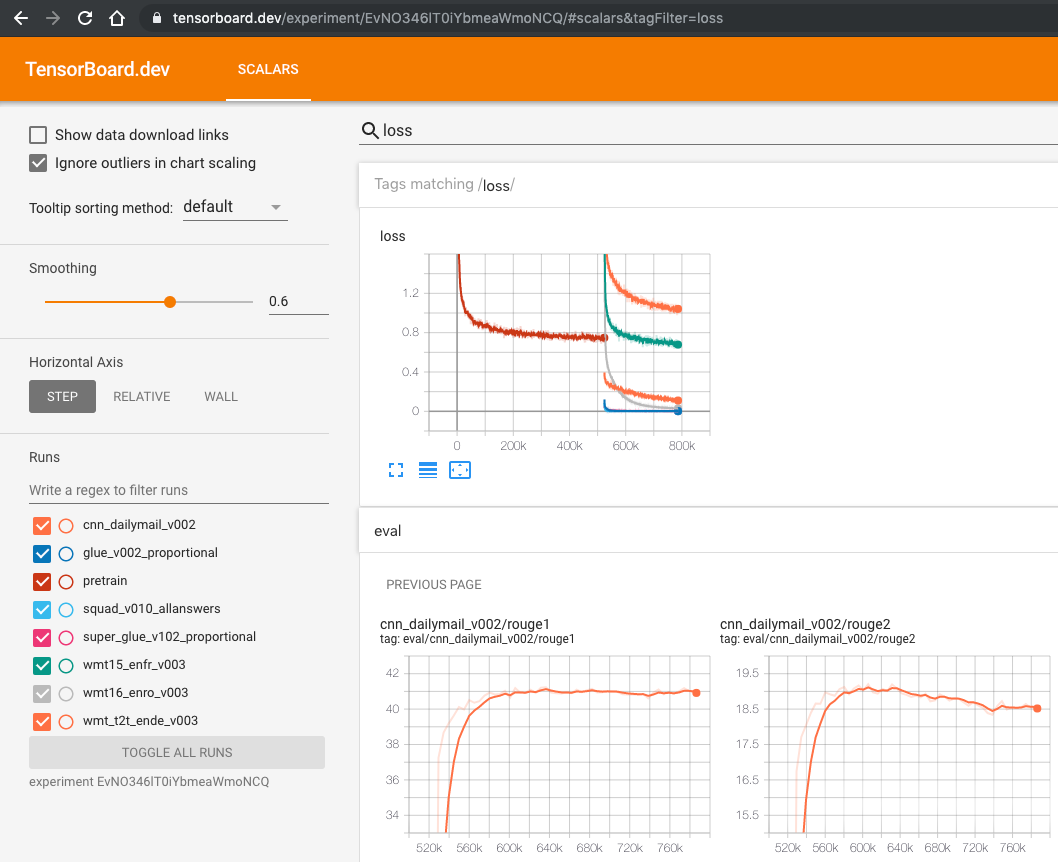

## References

TensorFlow Tutorials. URL: https://www.tensorflow.org/tutorials